# Adam Optimization: Paper Walkthrough




* In this post, we look at Adam Optimization method, by implementing the Adam Algorithm from <a href="https://arxiv.org/pdf/1412.6980.pdf">Adam: A Method for Stochastic Optimization</a>. Adam combines two Optimization algorithms, <b>RMSProp</b> and <b>AdaGrad</b> algorithms, hence, called <b> Adaptive Moment Estimation. </b>


* Interestingly, RMSProp algorithm was initially recommended by <a href="http://www.cs.toronto.edu/~hinton/">Geoffrey Hinton</a>, as a part of his Coursera course, where it was an initial recommendation by him. Link to the slides: https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf.


* Let us first understand and implement AdaGrad, followed by RMSProp, and see how to combines to provide and efficient and effective alternative to classical Stochastic Gradient Descent.  Adam is currently one of the most used Optimization algorithms used for faster convergence and is available in almost every single deep-learning framework. Below is a snapshot of Adam Optimization algorithm from the <a href="https://arxiv.org/pdf/1412.6980.pdf">paper.</a>


![alt text](adam.jpeg)

## Understanding Pseduo Code 

* The hyperparameters in Adam are ${\alpha}$ (step-size, same parameter we see in Stochastic GD), ${\beta}_1$, ${\beta}_2$, (Exponential decay parameters, range from [0,1]) and ${\epsilon}$, which is used for parameter update step.


* Also, note the notation ${\theta}_0$, is the weight matrix (W) of our Neural Network; and $g_t$ is essentially first derivative with respect to the weights. (dW) 


* We compute the <b> biased first moment estimate </b>, and the <b> biased second moment estimate </b>, and later correct for the bias for both the moments.


* Later, we update the parameters, and the cost function converges towards the minima; with much stable rate + direction, which is the advantage of Adam algorithm.

## What is a 'moment' ?

* From a statistical standpoint, moment is a quantitative measure of a shape of a function.

### First Moment

* The first moment of a distribution is the mean of the distribution itself. For intuition, let us consider a simple dataset as follows: X = [4,9,12,14,20,25,30].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([4,9,12,14,20,25,30])

plt.scatter(X,[0]*len(X))
plt.scatter(X.mean(), 0, label='mean')
plt.legend(), plt.grid()
plt.xlim(0,32)
plt.title("First Moment")

Text(0.5, 1.0, 'First Moment')

In [2]:
X.mean()

16.285714285714285

* The mean is the most basic representation of the array X; and describes central tendency.

### Second Moment

* The next good descriptor of shape is the variance; essentially the spread of the data-points of the array. Now, let us assume we have two different arrays, X1 and X2 (All points are the mean of X). 

 $$X1 = [4,9,12,14,20,25,30],   X2 = [16.28, 16.28, 16.28, 16.28, 16.28, 16.28, 16.28]$$
 
 
* Now, we calculate the second moment of X1 and X2, which is the variance of the two arrays.

In [3]:
X1 = [4,9,12,14,20,25,30]

X2 = [16.28,16.28,16.28,16.28,16.28,16.28,16.28]

np.var(X1), np.var(X2)

(72.20408163265307, 0.0)

* Essentially, variance captures the spread by finding squared distance for each point from the mean of the array; hence can be used as a good descriptor of the shape of the distribution/ function. 


* The first moment (Mean), is the average value of the array, starting from 0 on the axis. However, the second moment (variance) is the spread around the first moment (around the mean).


## Intuition of Momentum

* From the above two figures, we can clearly understand the effect of ${\beta_1}$. In the first figure, ${\beta_1}$=0.1, Hence, momentum is lower (average number of miles run till that day is weighted lesser, and the mosr recent run is weighted higher), when compared to the right figure, where ${\beta_1}$=0.9, where the most recent run is weighted less, when compared to the overall aerage miles run till that day.


* <b>An intuitive way of thinking about this problem is as follows: Think of ${\beta_1}$ as friction on a road. Higher the friction, lower is the effect of acceleration (first order derivative), lower the friction, more the effect of derivative term (recent change is weighted higher).</b>


* In the above, we consider only one parameter ${\theta}$; momentum can be applied for the whole range of parameters, and dampen oscillations, which helps it move towards the direction of higher momentum, which helps in convergence. Hence, using momentum is almost like using a low-pass filter, where higher oscillations are damped, and hence outputs non-spiky or stable cost.

## RMSProp 

* We now have an understanding of the upate step of first moment (biased), where ${\beta_1}$ acts as a 'friction' parameter as explained above.

$${m_t \leftarrow \beta_1.m_{t-1} + (1-\beta_1).g_t}$$


* RMSProp introduces the second raw moment into the picture, which improves the 'speed' towards the direction of 'momentum' (when combined with the first moment). Below is the update step for second raw moment (biased).

$${v_t \leftarrow \beta_2.v_{t-1} + (1-\beta_2).g_t^2}$$



* In the final parameter update step $${\theta_t \leftarrow \theta_{t-1} - \frac {\alpha.m_t}{\sqrt{v_t}}}$$ note that the ${v_t}$, ${m_t}$ here is unbiased and we will see later why we need to use an unbiased estimate for the final parameter update step.

## Toy Example

* According to RMSProp, The parameter update step is inversely proportional to the raw second moment, which describes the spread towards direction of parameter. Let us assume two parameters ${\theta_0}$, ${\theta_1}$, with the decreasing cost as follows: 

Text(0, 0.5, 'theta_1')

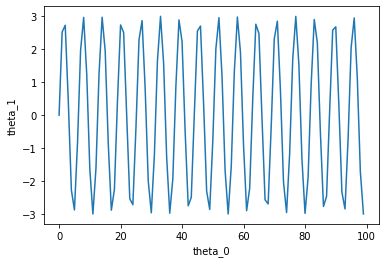

In [4]:
# theta0 is a real valued function
theta0 = np.array([i for i in range(0, 100)])

# theta1 is a Sign function
theta1 = [3*np.sin(i) for i in theta0]
plt.plot(theta0, theta1)
plt.xlabel("theta_0")
plt.ylabel("theta_1")

* From the above example, we see that ${\theta_0}$ array is real valued and increases by one unit. The array ${\theta_1}$ is a Sine transformation of ${\theta_0}$; Hence, has noisy waveform. We take the first and second moments on both ${\theta_0}$ and ${\theta_1}$.


* Obviously, the first derivative of the Sine wave returns Cosine waveform, and ${\theta_0}$ array being line with slope 0, is at constant derivative value (y = mx + c; dy/dx = 1). The second moments have also been plotted along wiht the first moments.

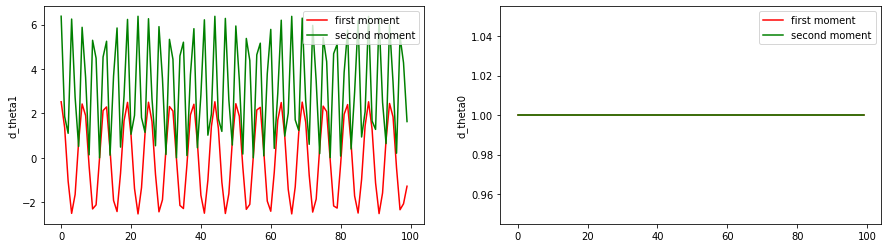

In [5]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(theta0, np.gradient(theta1), c='r', label='first moment')
plt.plot(theta0, np.multiply(np.gradient(theta1),np.gradient(theta1)), c='g', label='second moment')
plt.legend(loc=0)
plt.ylabel('d_theta1')

plt.subplot(122)
plt.plot(theta0, np.gradient(theta0), c='r', label='first moment')
plt.plot(theta0, np.multiply(np.gradient(theta0),np.gradient(theta0)), c='g', label='second moment')
plt.legend(loc=0)
plt.ylabel('d_theta0')
plt.show()

## Theta1 (Left Figure)

Coming back to RMSProp equation:  ${v_t \leftarrow \beta_2.v_{t-1} + (1-\beta_2).g_t^2}$ and update equation: ${\theta_t \leftarrow \theta_{t-1} - \frac {\alpha.m_t}{\sqrt{v_t}}}$.

For ${\theta_1}$, we see that ${g_t^2}$ ~= 3.5, assuming ${\beta_2}$ = 0.99, ${(1-\beta_2).g_t^2}$ = 0.035

## Theta0 (Right Figure)

In case of ${\theta_0}$, we know that the value of ${g_t^2}$ is same as ${g_t}$, and equal to 1. Hence, ${(1-\beta_2).g_t^2}$ ~= 0.01.

<b> Hence, ${v_t}$ term for ${\theta_1}$ > ${v_t}$ term for ${\theta_0}$ </b>

## Parameters update 

* In the final update step, ${\theta_t \leftarrow \theta_{t-1} - \frac {\alpha.m_t}{\sqrt{v_t}}}$, hence, along ${\theta_1}$ (y-axis), updated ${\theta_t}$ is smaller/ damped, and ${\theta_0}$ (along x-axis), can update at a higher rate. 


* Essentially, covergence along direction of noisy update is slower, and along non-noisy direction is faster. Hence, RMSProp along with momentum, acts like a <b>'pushing or pulling force'</b> along a direction. This also lays itself well to help tune <b>Learning Rate ${\alpha}$ </b>, and can now be much larger than what we normally choose.

## Bias-Correction 

* After cmpleting the first moment and second moment steps, we need to correct the two terms before sending through the parameter update step, to correct the initial bias for both ${m_t}$ = 0 and ${v_t}$ = 0. 


* While calculating exponential weighted averages, both Momentum + RMSProp both the terms ${m_0}$ = ${v_0}$ = 0 (Biased), and hence takes a few steps to take off from 0 to the corresponding average values.


* To remove the initial lag in convergence, we correct the term by dividing the term with (1-${\beta^t}$). Observe that ${\beta}$ has been raised to the power 't', hence, the value of (1-${\beta^t}$) converge to 1 as 't' increases.

Text(0.5, 1.0, '# of updates/ iterations vs (1-beta 2) term')

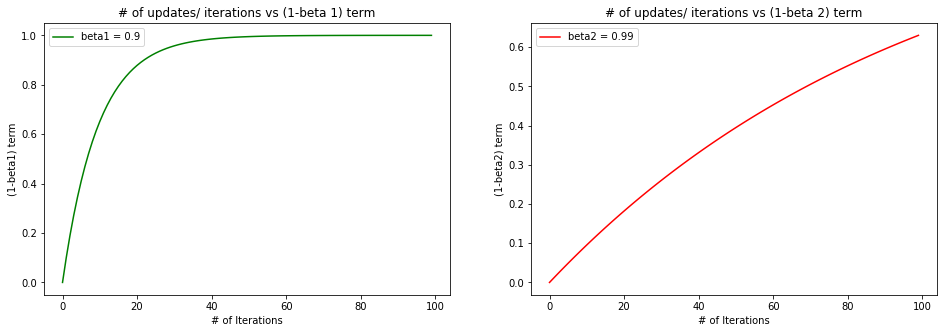

In [6]:
beta1 = 0.9
beta2 = 0.99

t_list = [t for t in range(0,100)]

value_term_1 = [(1-(beta1)**t) for t in t_list]
value_term_2 = [(1-(beta2)**t) for t in t_list]

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(t_list, value_term_1, c='g', label='beta1 = 0.9')
plt.legend()
plt.xlabel('# of Iterations')
plt.ylabel('(1-beta1) term')
plt.title('# of updates/ iterations vs (1-beta 1) term')

plt.subplot(122)
plt.plot(t_list, value_term_2, c='r', label='beta2 = 0.99')
plt.legend()
plt.xlabel('# of Iterations')
plt.ylabel('(1-beta2) term')
plt.title('# of updates/ iterations vs (1-beta 2) term')

We see how correcting the bias can help convergence in initial steps to take lesser number of iterations to reach minima.

Hence, both the terms ${m_t}$, ${v_t}$ are corrected for bias by the following equations

$${\hat m_t \leftarrow \frac {m_t}{(1-{\beta_1^t})}}$$

$${\hat v_t \leftarrow \frac {m_t}{(1-{\beta_2^t})}}$$

## Final Update Step

In the final update step, ${\theta_t \leftarrow \theta_{t-1} - \frac {\alpha.m_t}{\sqrt{v_t}}}$, authors also add an ${\epsilon}$ term, generally chosen to be ${10^{-8}}$, which also helps with correction during initial iterations of updates. Hence, the final equation for Adams, which combines Momentum with RMSProp and corrected biases, is as follows:


$${\theta_t \leftarrow \theta_{t-1} - \frac {\alpha.\hat m_t}{\sqrt{\hat v_t} + \epsilon}}$$

Note: Adam outperforms most Optimization algorithms, almost in all cases (with or without dropout).

<hr>

## Keras Implementation

Let us use the fashion MNIST dataset and see if Adam Optimizer outperforms other Optimization algorithms. (Multi-class Classification Task)

In [11]:
# MNIST dataset
# importing keras

import warnings
warnings.filterwarnings("ignore")

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [12]:
# images and labels into train and test split
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# label class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# normalizing traing and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# funciton returns NN model
def NNModel():

    # sequential model
    clf_NN = Sequential()

    clf_NN.add(Flatten(input_shape=(28, 28)))

    # adding Dense layers with Relu activation and 50 units
    clf_NN.add(Dense(units=784,activation='relu',kernel_initializer='uniform'))

    # adding Dense layers with Relu activation and 50 units
    clf_NN.add(Dense(units=392,activation='relu',kernel_initializer='uniform'))

    # adding Dense layers with Relu activation and 50 units
    clf_NN.add(Dense(units=200,activation='relu',kernel_initializer='uniform'))

    # adding Dense layers with Relu activation and 20 units
    clf_NN.add(Dense(units=100,activation='relu',kernel_initializer='uniform'))

    # adding Dense layers with Relu activation and 20 units
    clf_NN.add(Dense(units=50,activation='relu',kernel_initializer='uniform'))

    # adding final activation layer with Softmax function
    clf_NN.add(Dense(activation='softmax', units=10))

    return clf_NN

## SGD Optimizer 

In [16]:
# Now, we import SGD Optimizer and compile the model

SGD_opt = keras.optimizers.SGD()

# compile NN model

SGD_NNModel = NNModel()

SGD_NNModel.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD_opt,
              metrics=['accuracy'])

# fitting ytraining data with batch size and number of epochs

SGD_NNModel.fit(train_images, train_labels, batch_size=256, epochs=16, verbose=2)

test_loss, test_acc = SGD_NNModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/16
 - 4s - loss: 2.3001 - acc: 0.1939
Epoch 2/16
 - 3s - loss: 2.2949 - acc: 0.3436
Epoch 3/16
 - 3s - loss: 2.2850 - acc: 0.3963
Epoch 4/16
 - 3s - loss: 2.2587 - acc: 0.4281
Epoch 5/16
 - 4s - loss: 2.1410 - acc: 0.4131
Epoch 6/16
 - 4s - loss: 1.5913 - acc: 0.4763
Epoch 7/16
 - 4s - loss: 1.0642 - acc: 0.6071
Epoch 8/16
 - 4s - loss: 0.8876 - acc: 0.6607
Epoch 9/16
 - 4s - loss: 0.8333 - acc: 0.6859
Epoch 10/16
 - 3s - loss: 0.7815 - acc: 0.7180
Epoch 11/16
 - 4s - loss: 0.7417 - acc: 0.7343
Epoch 12/16
 - 4s - loss: 0.7111 - acc: 0.7469
Epoch 13/16
 - 4s - loss: 0.6844 - acc: 0.7553
Epoch 14/16
 - 4s - loss: 0.6600 - acc: 0.7629
Epoch 15/16
 - 4s - loss: 0.6420 - acc: 0.7704
Epoch 16/16
 - 4s - loss: 0.6248 - acc: 0.7759
10000/10000 [==============================] - 0s 32us/step
Test accuracy: 0.7668


## Adam Optimizer and selecting hyperparameters 

In [17]:
# Now, we import Adam Optimizer and select hyperparameters

# we select a learning rate, beta1, beta2 values as seen in Adam Algorithm

adam_opt = keras.optimizers.adam(lr=0.005, beta_1=0.9, beta_2=0.99)

# compile NN model

Adam_NNModel = NNModel()

Adam_NNModel.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam_opt,
              metrics=['accuracy'])

# training data with batch size and number of epochs

Adam_NNModel.fit(train_images, train_labels, batch_size=256, epochs=16, verbose=2)

Epoch 1/16
 - 5s - loss: 0.6978 - acc: 0.7370
Epoch 2/16
 - 5s - loss: 0.4045 - acc: 0.8527
Epoch 3/16
 - 6s - loss: 0.3548 - acc: 0.8710
Epoch 4/16
 - 5s - loss: 0.3334 - acc: 0.8783
Epoch 5/16
 - 5s - loss: 0.3166 - acc: 0.8848
Epoch 6/16
 - 5s - loss: 0.3087 - acc: 0.8860
Epoch 7/16
 - 5s - loss: 0.2860 - acc: 0.8940
Epoch 8/16
 - 6s - loss: 0.2836 - acc: 0.8973
Epoch 9/16
 - 5s - loss: 0.2718 - acc: 0.8986
Epoch 10/16
 - 6s - loss: 0.2637 - acc: 0.9038
Epoch 11/16
 - 5s - loss: 0.2546 - acc: 0.9058
Epoch 12/16
 - 5s - loss: 0.2467 - acc: 0.9084
Epoch 13/16
 - 5s - loss: 0.2434 - acc: 0.9096
Epoch 14/16
 - 5s - loss: 0.2396 - acc: 0.9101
Epoch 15/16
 - 6s - loss: 0.2372 - acc: 0.9122
Epoch 16/16
 - 6s - loss: 0.2266 - acc: 0.9160


In [18]:
test_loss, test_acc = Adam_NNModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.8839


### We observe faster convegence towards minima as see improved Training + Testing accuracy for Adams Optimization over traditional Stochastic GD.

### As we can see, the Neural Net above classifies test dataset with around 88 % accuracy, however, tends to overfit. In the next post, we will walkthrough Dropout technique, used to <a href="https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf">prevent overfitting</a>.

### As Neural Nets keep getting deeper and complex architectures come into picture, as data-size, # of dimensions and computational complexity increase, using Adams Optimization can save valuable processing, computational cost & time.